<a href="https://colab.research.google.com/github/shoryasethia/XRay-Penumonia/blob/main/Chest_XRay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip
!pip install numpy tensorflow matplotlib.pyplot


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0450-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0451-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0452-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0453-0001-0002.jpeg  
  inflating: chest_xra

In [26]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras import models, layers

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './chest_xray/train'
val_dir = './chest_xray/val'
test_dir = './chest_xray/test'


train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(train_dir,
                                           batch_size = 128,
                                           class_mode = 'binary',
                                           target_size = (224,224),
                                           shuffle = True)

val_data = val_datagen.flow_from_directory(val_dir,
                                           batch_size = 128,
                                           class_mode = 'binary',
                                           target_size = (224,224),
                                           shuffle = True)

test_data = test_datagen.flow_from_directory(test_dir,
                                           batch_size = 128,
                                           class_mode = 'binary',
                                           target_size = (224,224))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.20),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(0.20),

    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
        loss="binary_crossentropy",
        metrics=["accuracy"])


model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 26, 26, 128)     

In [37]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

ptime = time.time()

history = model.fit(train_data, validation_data=val_data, epochs = 10, verbose=1, callbacks=[myCallback()])
ctime = time.time()

print(f"Time taken by model to fit is = {ctime-ptime}")


Epoch 1/10
41/41 [==============================] - 50s 1s/step - loss: 0.1135 - accuracy: 0.9574 - val_loss: 0.8442 - val_accuracy: 0.6250
Epoch 2/10
41/41 [==============================] - 50s 1s/step - loss: 0.1136 - accuracy: 0.9572 - val_loss: 0.3344 - val_accuracy: 0.8125
Epoch 3/10
41/41 [==============================] - 61s 1s/step - loss: 0.0832 - accuracy: 0.9724 - val_loss: 0.1691 - val_accuracy: 0.8750
Epoch 4/10
41/41 [==============================] - 57s 1s/step - loss: 0.0579 - accuracy: 0.9803 - val_loss: 0.0723 - val_accuracy: 1.0000
Epoch 5/10
41/41 [==============================] - 63s 1s/step - loss: 0.0489 - accuracy: 0.9820 - val_loss: 0.3546 - val_accuracy: 0.8125
Epoch 6/10
41/41 [==============================] - 54s 1s/step - loss: 0.0422 - accuracy: 0.9837 - val_loss: 0.1386 - val_accuracy: 0.9375
Epoch 7/10
41/41 [==============================] - 51s 1s/step - loss: 0.0370 - accuracy: 0.9866 - val_loss: 0.1611 - val_accuracy: 0.9375
Epoch 8/10
41/41 [==

Text(0.5, 1.0, 'Training and validation loss')

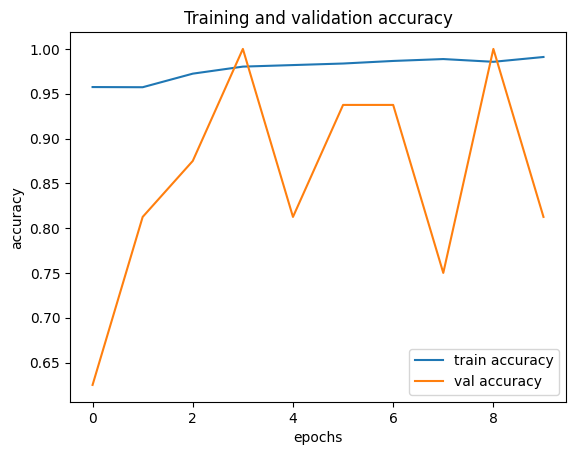

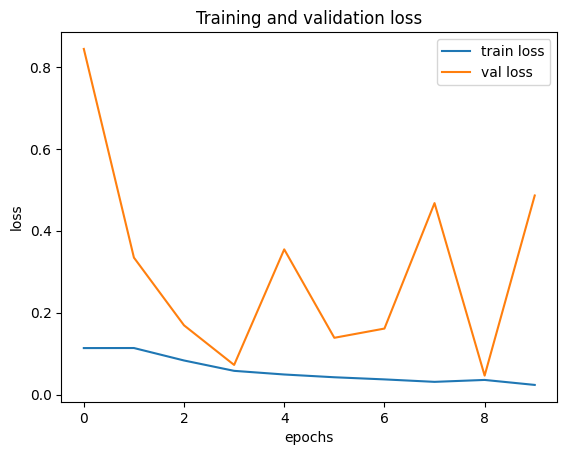

In [38]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc))

# plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()

# plot training and validation loss per epoch
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')

In [44]:
model.evaluate(test_data)

5/5 [==============================] - 6s 1s/step - loss: 1.8709 - accuracy: 0.7484


[1.8708994388580322, 0.7483974099159241]

In [45]:
model.evaluate(val_data)

1/1 [==============================] - 0s 165ms/step - loss: 0.4862 - accuracy: 0.8125


[0.4861656427383423, 0.8125]

1/1 [==============================] - 0s 23ms/step


<ipython-input-58-ee9c74878b8f>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(np.round(predictions[i]))


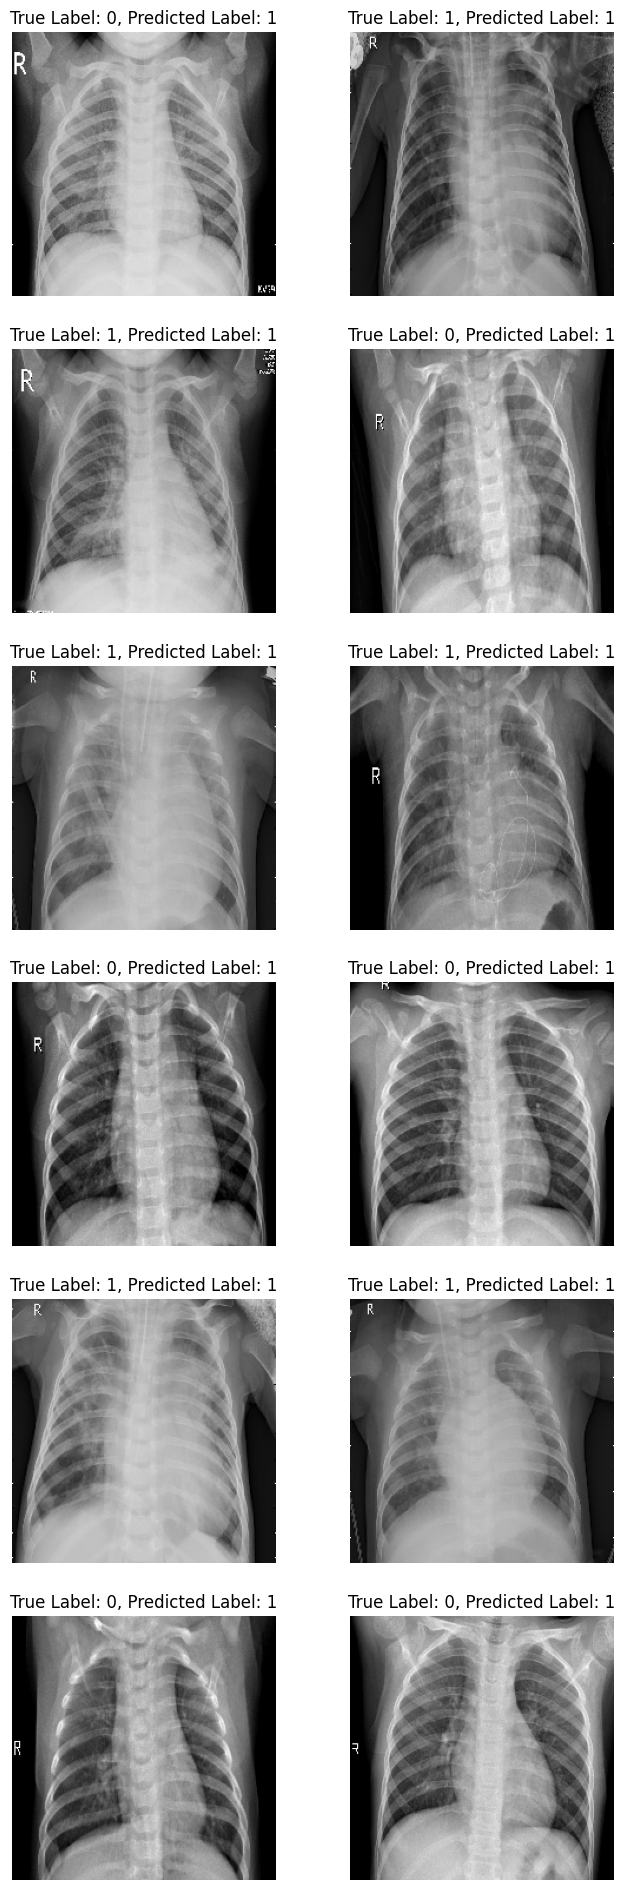

In [58]:
# Set up matplotlib fig, and size it to fit 3x4 pics
nrows = 6
ncols = 2
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# Randomly select a few testing samples
num_predictions = 12
test_images, test_labels = next(test_data)
test_indices = np.random.choice(np.arange(0, len(test_images)), size=num_predictions)
test_images = test_images[test_indices]
test_labels = test_labels[test_indices]

# Compute predictions
predictions = model.predict(test_images)

for i in range(num_predictions):
    # Select the most probable class
    prediction = int(np.round(predictions[i]))

    # Rescale the test image
    image = (test_images[i] * 255).astype("uint8")

    # Show the image with true label and predicted label
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(image)
    plt.title(f'True Label: {int(test_labels[i])}, Predicted Label: {prediction}')
    plt.axis('off')

plt.show()
